In [1]:
# 导入必要包
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

1. 设计模型
2. 损失函数和优化器
3. 训练

epoth: 10, loss： 4396.799
epoth: 20, loss： 3281.378
epoth: 30, loss： 2473.921
epoth: 40, loss： 1888.799
epoth: 50, loss： 1464.385
epoth: 60, loss： 1156.269
epoth: 70, loss： 932.401
epoth: 80, loss： 769.622
epoth: 90, loss： 651.182
epoth: 100, loss： 564.948


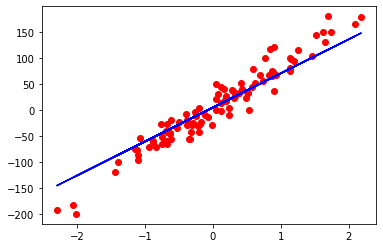

In [16]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
y = Y.view(-1, 1)
n_sample, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
learning_rate = .01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epoths = 100
for epoth in range(num_epoths):
    y_pred = model(X)
    loss = criterion(y, y_pred)
    # backward
    loss.backward()
    # update
    optimizer.step()
    # clear the gradient
    optimizer.zero_grad()
    if (epoth + 1) % 10 == 0:
        print(f'epoth: {epoth + 1}, loss： {loss.item():.3f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
